In [1]:
# imports
import os
import sys

# Get the directory of the current file
current_dir = os.path.dirname(os.path.realpath('__file__'))

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
# Add the current directory and parent directory to the system path
sys.path.insert(0, current_dir)
sys.path.insert(0, parent_dir)

import numpy as np              # Python's standard numerical library
import matplotlib.pyplot as plt # Python's scientific visualization library
# from pixel_setter import play_video
# from scipy.ndimage import uniform_filter
import importlib
from EMA_functions import *
from DIC_functions import *
import glob
import ast
from sdypy import EMA
import pickle as pkl
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib.gridspec as gridspec
# import re

# Import test data
df_file_description = pd.read_csv('I:/My Drive/PHD/HSC/file_descriptions_wEMA.csv')
df_file_description = df_file_description.loc[:, ~df_file_description.columns.str.startswith('Unnamed')]
df_file_description.columns

c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\napari\utils\misc.py:428: DeprecationWarning: `CallDefault` in napari v0.5.0 and will be removed in v0.6.0.
  warnings.warn(
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Index(['filename', 'path', 'ecc', 'loc', 'mass', 'taut/loose', 'impact/pluck',
       'version', 'n_frames', 'fps', 'Oversatured pixels',
       'Undersatured pixels', 'prey_ij', 'spider_ij', 'peak_n', 'nut_idx',
       'd_lim', 'smooth_lim', 'max_drift', 'max_end_drift', 'lower', 'upper',
       'pol_order_high', 'added_damping', 'near_zero_threshold',
       'approximate_height', 'peak_F', 'peak_F_threshold', 'shift',
       'test_number', 'higher', 'spider_ij_d', 'prey_ij_d', 'id0_cam',
       'id0_for', 'double_tap', 'root', 'path2', 'max_t_diff', 'max_d_diff'],
      dtype='object')

In [2]:
# if 'max_t_diff' not in df_file_description.columns:
#     df_file_description['max_t_diff'] = None
# if 'max_d_diff' not in df_file_description.columns:
#     df_file_description['max_d_diff'] = None
# # files = glob.glob('D:/thijsmas/HSC/**/*.cihx', recursive=True)
# # for file_i, file in enumerate(files):
# #     name_video = os.path.basename(file)
# #     root_video = os.path.dirname(file)
# #     df_filtered = df_file_description[df_file_description['filename'].isin([name_video])]

# #     df_file_description.loc[df_filtered.index, 'root'] = root_video
# #     df_file_description.loc[df_filtered.index, 'path2'] = file

# df_file_description = df_file_description.loc[:, ~df_file_description.columns.str.startswith('Unnamed')]
# df_file_description.to_csv('I:/My Drive/PHD/HSC/file_descriptions_wEMA.csv')

In [3]:
ecc = 0
taut_loose = 'Loose'
impact_pluck = 'Impact'
mass = True
df_filtered = df_file_description[(df_file_description['ecc'] == ecc) & (df_file_description['taut/loose'] == taut_loose) & (df_file_description['impact/pluck'] == impact_pluck) & (df_file_description['mass'] == mass)]
df_filtered['filename']

172      Full_web_ecc0_new_Floc1_v0_S01.cihx
173      Full_web_ecc0_new_Floc1_v1_S01.cihx
174      Full_web_ecc0_new_Floc2_v0_S01.cihx
175      Full_web_ecc0_new_Floc2_v1_S01.cihx
176      Full_web_ecc0_new_Floc2_v2_S01.cihx
177      Full_web_ecc0_new_Floc2_v3_S01.cihx
178      Full_web_ecc0_new_Floc3_v0_S01.cihx
179      Full_web_ecc0_new_Floc3_v1_S01.cihx
180      Full_web_ecc0_new_Floc3_v2_S01.cihx
181      Full_web_ecc0_new_Floc4_v0_S01.cihx
182      Full_web_ecc0_new_Floc4_v1_S01.cihx
183      Full_web_ecc0_new_Floc4_v2_S01.cihx
184      Full_web_ecc0_new_Floc5_v0_S01.cihx
185      Full_web_ecc0_new_Floc5_v1_S01.cihx
186      Full_web_ecc0_new_Floc6_v0_S01.cihx
187      Full_web_ecc0_new_Floc6_v1_S01.cihx
188      Full_web_ecc0_new_Floc6_v2_S01.cihx
189      Full_web_ecc0_new_Floc6_v3_S01.cihx
190      Full_web_ecc0_new_Floc7_v0_S01.cihx
191      Full_web_ecc0_new_Floc7_v1_S01.cihx
192      Full_web_ecc0_new_Floc7_v2_S01.cihx
193      Full_web_ecc0_new_Floc8_v0_S01.cihx
194      F

In [4]:
required_parameters = [ 'double_tap',
                        'prey_ij_d', 
                        'prey_ij', 
                        'spider_ij_d', 
                        'spider_ij',
                        'max_d_diff',
                        'max_t_diff',]
D_in = 40
D_out = 100
nut_wh = (15, 60)

C:\Users\thijsmas\AppData\Local\Temp\ipykernel_53036\2696402389.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_circ = cm.get_cmap('bwr')
c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:104: UserWarning: Clipped footage! (Total frame: 10000, Original total frame: 87371)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


D:/thijsmas/HSC\ecc0\web0\Full_web_ecc0_new_Floc1_v0_S01\Full_web_ecc0_new_Floc1_v0_S01.cihx
Full_web_ecc0_new_Floc5_v1_S01.cihx had a double impact


(7.4991758761456335, 8.026797690735796)

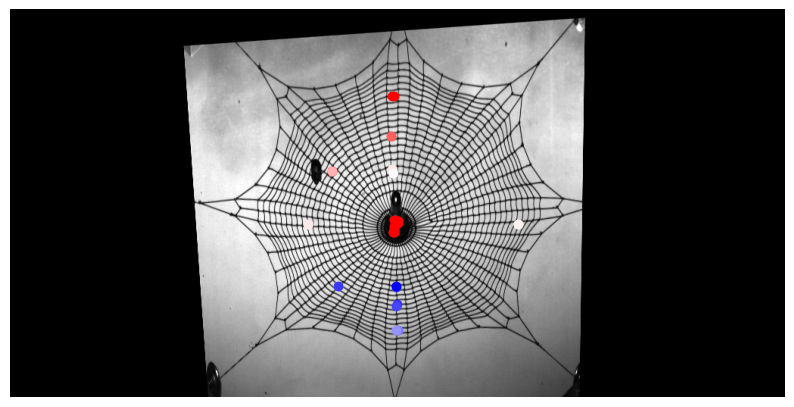

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
ax.axis('off')
cmap_circ = cm.get_cmap('bwr')
norm = col.Normalize(vmin=7.5, vmax=7.8) #ecc 0 new
# norm = col.Normalize(vmin=6.533822982015654, vmax=7.5) #ecc 0 new2
# norm = col.Normalize(vmin=7, vmax=8)    #ecc 1
# norm = col.Normalize(vmin=6.9, vmax=7.6) #ecc 2
sm = cm.ScalarMappable(norm = norm, cmap=cmap_circ)

fn0_min = 10000
fn0_max = 0

invalid_files = []
for file_i, (name_video, path_video, root_video) in enumerate(zip(df_filtered['filename'], df_filtered['path2'], df_filtered['root'])):

    if pd.isna(path_video):
        print(f'Could not open {name_video}')
        continue
    

    file_parameters, index = unpack_dataframe(df_filtered, name_video, required_parameters)
    if file_parameters is None:
        print(f'some items in {name_video} could not be unpacked')
        invalid_files.append(name_video)
        continue

    EMA_structure = EMA_Structure(name_video)
    EMA_structure.set_params(**file_parameters)
    EMA_structure.set_params(FN0 = 41.2, reaction_time = 0.1) # FN0 from Lott: Prey localization in spider orb webs using modal vibration analysis. reaction_time from (Klärner and Barth1982)
    if EMA_structure.double_tap:
        print(f'{name_video} had a double impact')
        invalid_files.append(name_video)
        continue

    if file_i == 0:
        name_video_base = name_video.split('.')[0]
        file_name_dist = os.path.join(root_video, f"{name_video_base}_dist.pkl")
        with open(file_name_dist, 'rb') as f:
            dist = pkl.load(f)
        homography_matrix = dist["homography_matrix"]
        video = EMA_structure.open_video(add_extension = False)
        still_image = video.reader.get_frame(0)
        height, width = still_image.shape
        undistorted_image = cv2.warpPerspective(still_image, homography_matrix, (width, height))
        ax.imshow(undistorted_image, cmap = 'gray')

    if not "new2" in path_video:
        continue

    file_path_cam = os.path.join(root_video, f'{name_video}_cam.pkl')
    try:
        with open(file_path_cam, 'rb') as f:
            cam = pkl.load(f)
    except:
        print(f'Could not open {name_video}')
        continue

    if 'nat_freq' not in cam.__dict__.keys():
        print(f'Conduct parameter estimation for {name_video}')
        invalid_files.append(name_video)
        continue
    if cam.nat_freq[0]==0:
        EMA_structure.fn0 = cam.nat_freq[1]
    else:
        EMA_structure.fn0 = cam.nat_freq[0]

    fn0_min = min(fn0_min, EMA_structure.fn0)
    fn0_max = max(fn0_max, EMA_structure.fn0)

    color = sm.to_rgba(EMA_structure.fn0)
    ax.plot(EMA_structure.spider_ij_d[0], EMA_structure.spider_ij_d[1], 'ro')
    ax.plot(EMA_structure.prey_ij_d[0], EMA_structure.prey_ij_d[1], 'o', color = color)
    
    
fn0_min, fn0_max

time delta

D:/thijsmas/HSC\ecc0\web0\Full_web_ecc0_new_Floc1_v0_S01\Full_web_ecc0_new_Floc1_v0_S01.cihx
Full_web_ecc0_new_Floc5_v1_S01.cihx had a double impact
D:/thijsmas/HSC\ecc1\web0\rev2\Full_web_ecc1_new0_rev2_Floc13_v1_S01\Full_web_ecc1_new0_rev2_Floc13_v1_S01.cihx
Full_web_ecc1_new0_rev2_Floc14_v0_S01.cihx had a double impact
Full_web_ecc1_new0_rev2_Floc13_v0_S01.cihx had a double impact
Could not open Full_web_ecc1_new_Floc5_v0_S01.cihx
Could not open Full_web_ecc1_new_Floc5_v1_S01.cihx
Could not open Full_web_ecc1_new_Floc5_v2_S01.cihx
Could not open Full_web_ecc1_new_Floc6_v0_S01.cihx
Could not open Full_web_ecc1_new_Floc6_v1_S01.cihx
Could not open Full_web_ecc1_new_Floc7_v0_S01.cihx
Could not open Full_web_ecc1_new_Floc7_v1_S01.cihx
Could not open Full_web_ecc1_new_Floc9_v0_S01.cihx
Could not open Full_web_ecc1_new_Floc9_v1_S01.cihx
Could not open Full_web_ecc1_new_Floc9_v2_S01.cihx
Could not open Full_web_ecc1_new_Floc1_v5_S01.cihx
Could not open Full_web_ecc1_new_Floc4_v1_S01.cihx
C

C:\Users\thijsmas\AppData\Local\Temp\ipykernel_53036\3034574872.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_circ = cm.get_cmap('bwr')


(0.0791873060250964, 0.1941906517590587)

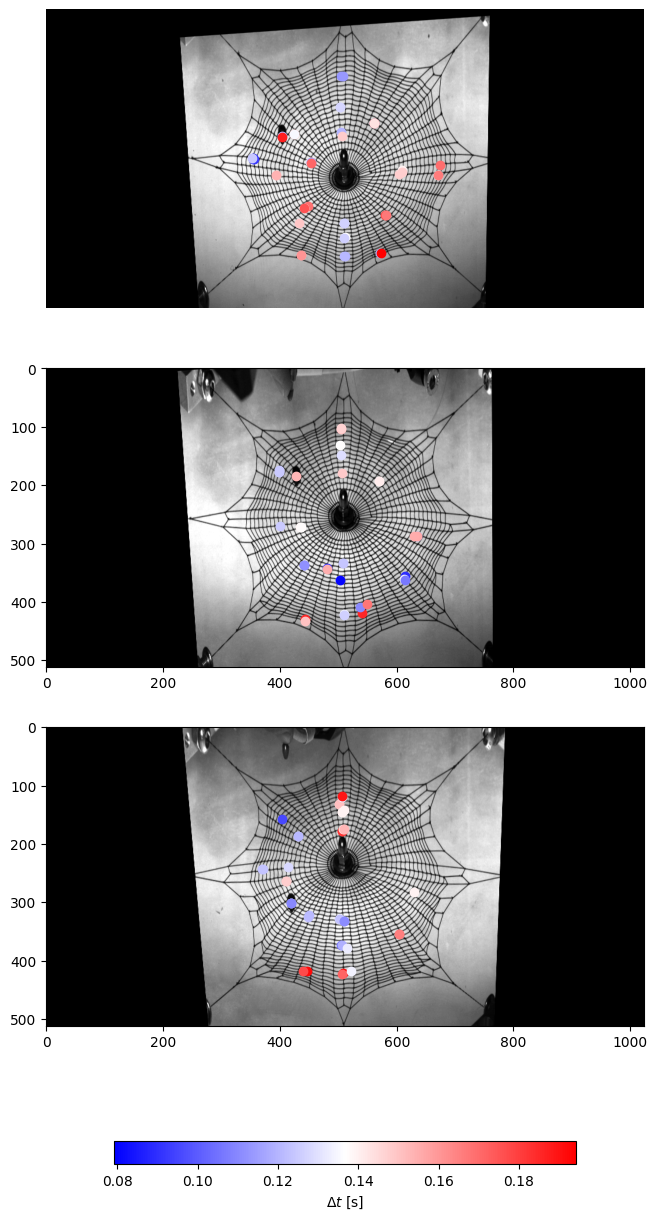

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
ax[0].axis('off')
ecc_vec = [0, 1, 2]
taut_loose = 'Loose'
impact_pluck = 'Impact'
mass = True

cmap_circ = cm.get_cmap('bwr')
norm = col.Normalize(vmin=0.0791873060250964, vmax=0.1941906517590587)
sm = cm.ScalarMappable(norm = norm, cmap=cmap_circ)

invalid_files = []
td_min = 1000
td_max = 0

for ecc_i, ecc in enumerate(ecc_vec):
    df_filtered = df_file_description[(df_file_description['ecc'] == ecc) & (df_file_description['taut/loose'] == taut_loose) & (df_file_description['impact/pluck'] == impact_pluck) & (df_file_description['mass'] == mass)]
    for file_i, (name_video, path_video, root_video) in enumerate(zip(df_filtered['filename'], df_filtered['path2'], df_filtered['root'])):

        if pd.isna(path_video):
            print(f'Could not open {name_video}')
            continue

        file_parameters, index = unpack_dataframe(df_filtered, name_video, required_parameters)
        if file_parameters is None:
            print(f'some items in {name_video} could not be unpacked')
            invalid_files.append(name_video)
            continue

        EMA_structure = EMA_Structure(name_video)
        EMA_structure.set_params(**file_parameters)
        EMA_structure.set_params(FN0 = 41.2, reaction_time = 0.1) # FN0 from Lott: Prey localization in spider orb webs using modal vibration analysis. reaction_time from (Klärner and Barth1982)
        if EMA_structure.double_tap:
            print(f'{name_video} had a double impact')
            invalid_files.append(name_video)
            continue

        if file_i == 0:
            name_video_base = name_video.split('.')[0]
            file_name_dist = os.path.join(root_video, f"{name_video_base}_dist.pkl")
            with open(file_name_dist, 'rb') as f:
                dist = pkl.load(f)
            homography_matrix = dist["homography_matrix"]
            video = EMA_structure.open_video(add_extension = False)
            still_image = video.reader.get_frame(0)
            height, width = still_image.shape
            undistorted_image = cv2.warpPerspective(still_image, homography_matrix, (width, height))
            ax[ecc_i].imshow(undistorted_image, cmap = 'gray')
        
        td_min = min(td_min, EMA_structure.max_t_diff)
        td_max = max(td_max, EMA_structure.max_t_diff)

        color = sm.to_rgba(EMA_structure.max_t_diff)
        # ax[ecc_i].plot(EMA_structure.spider_ij_d[0], EMA_structure.spider_ij_d[1], 'ro')
        ax[ecc_i].plot(EMA_structure.prey_ij_d[0], EMA_structure.prey_ij_d[1], 'o', color = color)

cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label(r'$\Delta t$ [s]')

td_min, td_max

amplitude delta

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
ax[0].axis('off')
ecc_vec = [0, 1, 2]
taut_loose = 'Loose'
impact_pluck = 'Impact'
mass = True

cmap_circ = cm.get_cmap('bwr')
norm = col.Normalize(vmin=0.1115664162071323, vmax=0.4313475011784516)
sm = cm.ScalarMappable(norm = norm, cmap=cmap_circ)

invalid_files = []
amp_min = 1000
amp_max = 0

for ecc_i, ecc in enumerate(ecc_vec):
    df_filtered = df_file_description[(df_file_description['ecc'] == ecc) & (df_file_description['taut/loose'] == taut_loose) & (df_file_description['impact/pluck'] == impact_pluck) & (df_file_description['mass'] == mass)]
    for file_i, (name_video, path_video, root_video) in enumerate(zip(df_filtered['filename'], df_filtered['path2'], df_filtered['root'])):

        if pd.isna(path_video):
            print(f'Could not open {name_video}')
            continue

        file_parameters, index = unpack_dataframe(df_filtered, name_video, required_parameters)
        if file_parameters is None:
            print(f'some items in {name_video} could not be unpacked')
            invalid_files.append(name_video)
            continue

        EMA_structure = EMA_Structure(name_video)
        EMA_structure.set_params(**file_parameters)
        EMA_structure.set_params(FN0 = 41.2, reaction_time = 0.1) # FN0 from Lott: Prey localization in spider orb webs using modal vibration analysis. reaction_time from (Klärner and Barth1982)
        if EMA_structure.double_tap:
            print(f'{name_video} had a double impact')
            invalid_files.append(name_video)
            continue

        if file_i == 0:
            name_video_base = name_video.split('.')[0]
            file_name_dist = os.path.join(root_video, f"{name_video_base}_dist.pkl")
            with open(file_name_dist, 'rb') as f:
                dist = pkl.load(f)
            homography_matrix = dist["homography_matrix"]
            video = EMA_structure.open_video(add_extension = False)
            still_image = video.reader.get_frame(0)
            height, width = still_image.shape
            undistorted_image = cv2.warpPerspective(still_image, homography_matrix, (width, height))
            ax[ecc_i].imshow(undistorted_image, cmap = 'gray')
        
        amp_min = min(amp_min, EMA_structure.max_d_diff)
        amp_max = max(amp_max, EMA_structure.max_d_diff)

        color = sm.to_rgba(EMA_structure.max_d_diff)
        ax[ecc_i].plot(EMA_structure.spider_ij_d[0], EMA_structure.spider_ij_d[1], 'ro')
        ax[ecc_i].plot(EMA_structure.prey_ij_d[0], EMA_structure.prey_ij_d[1], 'o', color = color)

amp_min, amp_max

In [67]:
required_parameters = [ 'double_tap',
                        'prey_ij_d', 
                        'prey_ij', 
                        'spider_ij_d', 
                        'spider_ij',
                        'max_d_diff',
                        'max_t_diff',
                        'smooth_lim',
                        'max_drift',
                        'max_end_drift',
                        'shift',
                        'd_lim']

ecc = 2
taut_loose = 'Loose'
impact_pluck = 'Impact'
mass = True
loc  = 8
df_filtered = df_file_description[(df_file_description['ecc'] == ecc) & (df_file_description['taut/loose'] == taut_loose) & (df_file_description['impact/pluck'] == impact_pluck) & (df_file_description['mass'] == mass) & (df_file_description['loc'] == loc)]
df_filtered

v_id = 0

(name_video, path_video, root_video) = (df_filtered['filename'].values[v_id], df_filtered['path2'].values[v_id], df_filtered['root'].values[v_id])
(name_video, path_video, root_video) 

('Full_web_ecc2_new_Floc8_v0_S01.cihx',
 'D:/thijsmas/HSC\\ecc2\\web0\\rev1\\Full_web_ecc2_new_Floc8_v0_S01\\Full_web_ecc2_new_Floc8_v0_S01.cihx',
 'D:/thijsmas/HSC\\ecc2\\web0\\rev1\\Full_web_ecc2_new_Floc8_v0_S01')

In [70]:
%matplotlib qt
file_parameters, index = unpack_dataframe(df_filtered, name_video, required_parameters)
EMA_structure = EMA_Structure(name_video)
EMA_structure.set_params(**file_parameters)
EMA_structure.set_params(FN0 = 41.2, reaction_time = 0.1) # FN0 from Lott: Prey localization in spider orb webs using modal vibration analysis. reaction_time from (Klärner and Barth1982)
if EMA_structure.double_tap:
    print(f'{name_video} had a double impact')


DIC_structure = DIC_Structure(path_video)
EMA_structure.tp, EMA_structure.d = DIC_structure.join_results([1])
td = 5*EMA_structure.d +  EMA_structure.tp.reshape(len(EMA_structure.tp),1,2)

# EMA_structure.initialize_signals()
EMA_structure.initialize_displacement(idx='all', dir='xy')
EMA_structure.nut_idx((EMA_structure.prey_ij[0] + EMA_structure.shift[0], EMA_structure.prey_ij[1] + EMA_structure.shift[1]), exclude_high_amplitude = True, d_lim = EMA_structure.d_lim)
smooth_signals = np.max(np.abs(np.diff(np.linalg.norm(EMA_structure.d, axis=2))), axis = 1) < EMA_structure.smooth_lim
non_drifting = np.abs(np.mean(np.linalg.norm(EMA_structure.d[:,:-100], axis=2), axis=1) < EMA_structure.max_drift)
non_drifting2 = np.abs(np.linalg.norm(EMA_structure.d[:,-1], axis=1)) < EMA_structure.max_end_drift
EMA_structure.valid_tps = smooth_signals & non_drifting & non_drifting2 & EMA_structure.exclude_high_amplitude

video = EMA_structure.open_video(add_extension = False)
file_parameters
ani = EMA_structure.play_video(video, frame_range=range(250, 900), points = td[EMA_structure.valid_tps, 1:, :])


Full_web_ecc2_new_Floc8_v0_S01.cihx had a double impact
Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:104: UserWarning: Clipped footage! (Total frame: 7000, Original total frame: 87371)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


D:/thijsmas/HSC\ecc2\web0\rev1\Full_web_ecc2_new_Floc8_v0_S01\Full_web_ecc2_new_Floc8_v0_S01.cihx


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyidi\pyidi.py:268: DeprecationWarning: `self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.
  warnings.warn('`self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.', DeprecationWarning)
